This article reviews the paper:

<b><a href="https://ftp.cs.ucla.edu/pub/stat_ser/R290-A.pdf">A General Identification Condition for Causal Effects</a></b>

This paper is authored by Jin Tian (Iowa State University) and Judea Pearl (UCLA). I also provide code in Python to implement the ideas in their paper. This is not an introduction to causal inference or do-calculus. See http://www.michaelnielsen.org/ddi/if-correlation-doesnt-imply-causation-then-what-does/ for an introduction.

# Background 

On 1995, Pearl published a paper in Biometrika (a journal started by Karl Pearson!) that gave three rules to identify causal effects (<a href="#pearl_1995">Pearl, 1995</a>) assuming a DAG is provided.

### Three Rules of Do-Calculus

#### Rule 1 (Insertion/Deletion of Observations)
$(Y \perp Z| X, W)_{G_{\overline{X}}}$ ==> $P(Y|do(X), Z, W) = P(Y | do(X), W)$

#### Rule 2 (Action/Observation Exchange)
$(Y \perp Z | Z, W)_{G_{\overline{X} \underline{Z}}}$ ==> $P(Y|do(X), do(Z), W) = P(Y | do(X), Z, W)$

#### Rule 3 (Insertion/Deletion of Actions)
$(Y \perp Z | X, W)_{G_{\overline{X} \overline{Z(W)}}}$ ==> $P(Y|do(X), do(Z), W) = P(Y | do(X), W)$

(${G_{\overline{X}}}$ is a graph where all incoming arrows to $X$ are deleted. ${G_{\underline{X}}}$ is a graph where all outgoing arrows from $X$ are deleted.)

The rules above are sufficient, but not necessary. Ilya Shpitser reminded Pearl that Huang and Valtorta proved that rule 1 follows from rules 2 and 3. (see comment post by Pearl at bottom page (<a href="#nielsen_2012">Nielsen and Pearl, 2012</a>), (<a href="#huang_2006">Huang and Valtora, 2006</a>))

Pearl proved identfiability for a few special cases (<a href="#pearl_1995">Pearl, 1995</a>). But for any DAG with a mixture of latent and non-latent variables, is identification always possible? The answer is yes. But the answer would have to wait until 2006 when two independent papers provided the proof (See <a href="#shpitser_2006">Shpitser and Pearl, 2006</a>) and <a href="#huang_2006">Huang and Valtorta, 2006</a>).


So what is this paper about? This paper by Jin Tian appears to be an early precursor to the general case. It proves identifability under a few assumptions.

### Assumptions
* The DAG is known a priori
* Every latent node in the DAG, has exactly two non-latent children and no parents (this is called a _semi-Markov_ model)
* For the do-query of $P(V | do(X))$ interest, X is a singleton (i.e., one variable only)


OK, with those assumptions noted. We just need to review some jargon necessary before diving into this paper.

### Jargon
<b>Semi-markov Model:</b> A DAG such where all latent nodes have no parents and each have exactly two children.


<b>Component:</b> If parts of a graph are disconnected from the rest of the network, we call that a component. You can think of the number of components equaling the "islands" in a graph. That is, subgraphs disconnected from the rest of the graph.

<b>Bidirected Arrow:</b> When two non-latent nodes share a latent parent, you can draw directed arrows toward the children. Or, you can simply connect the children via a bidirected arrow. The line is drawn as a dashed line. (See Figure 1 below which was taken from the paper)

<b>pa function</b> The $pa$ function returns the set of variables that are parents of the inputted node (e.g., in figure 1, $pa(Z_1) = \{X, Z_2\}$

<b>ch function</b> The $ch$ function returns the set of variables that are children of the inputted node (e.g., in figure 1, $pa(Z_1) = \{Y\}$

<b>pa_u function</b> The $pa_u$ operator returns the set of variables that are parents of the inputted node but only keeps the hidden parents (i.e., filters out all observable ones)

<b>Bidirected Path:</b> A path connected by bidirected arrows

<b>Latent Variable:</b> A variable which cannot be observed given the data (e.g., the mental health state of a person's mind)

<img src="{static}/images/bidirected.png" style="height:200px">

As a quick example, in the above figure (taken from their paper), $X$ and $Z_2$ actually have a common parent (a latent one). Instead of drawing it, we denote that $X$ and $Z_2$ are both confounded by drawing this dash bidrected arrow.

### Intervention

And finally, we should review some quick theory before their results will make sense.

For a semi-markovian DAG, we can _always_ write the joint as:

$P(U, V) =  P(U) \prod_{i} P(v_i | pa(x_i), pa_u(x_i))$

Where $U$ is the set of latent nodes and $V$ is the set of non-latent nodes (i.e., the ones we have data for).

The above equation always work due to the assumptions of the semi-Markovian model. Remember, the joint distribution of the latent is independent of the observables (therefore, it factorizes out). Now, we can marginalize out the latent nodes:

$P(V) =  \sum_U \prod_{i} P(v_i | pa(x_i), pa_u(x_i)) P(U)$

Now, what would be the causal effect under this equation? Well, under an intervention, the term $P(X = x_0 | pa(X))$ is set to a specific state. Let's call this state say, $x_0$. This means that $P(X = x_0 | pa(X)) = 1$. Why? Because we set it, so the probability of that state must be 1. This also means everywhere $X$ appears, it must now also assume the value $x_0$.

$P(V | do(X)) =  \sum_U \prod_{\{i | V_i \ne X \}} P(v_i | pa(x_i), pa_u(x_i)) P(U)$


The above is the causal estimand. Note that it "skips" over the $X$ since that value is now just 1. Also, notice it's not necessariliy estimable! That is, not identiable. And the reason is, is that it depends on knowledge of $U$. Because some of the factors, are conditioned on that. But, if we can show they can be marganlized out, and we only left with probability statements that only involve $V$, then we win. We have identifability.

# Identification

Tian and Pearl broke the task of identification into a few cases. Each case builds up to a more complex case, but helps build intution into what we are doing.


## The Easy Case

If $X$ has no latent parents, we can calculate the causal effect.

#### The Proof
For the case where $X$ has no latent parents. We can factor it out of the joint distribution, and, we can drop the $pa_u(x_i)$ conditioning statement (i.e., $P(X) = P(X | pa(X), pa_u(X)) = P(X | pa(X))$):

We are now left with:

$P(V) = \sum_U P(X | pa(X)) \prod_{\{i | V_i \ne X \}} P(V_i | pa(V_i), pa_u(V_i)) P(U)$

But this is nothing more than:

$P(V) = P(X | pa(X)) P(V | do(X))$

or:

$P(V | do(X)) = \frac{P(V)}{P(X | pa(X))}$

And that's it, we have identfiability! Because the R.H.S contains no do-statements. So this estimand is identiable with observational data.

## The More Interesting Case

#### What's the statement?
If $X$ children do not have latent parents, then we can calculate the casual effect.

#### The Proof
Let's revist our observable joint distribution:

$P(V) = \sum_U \prod_{i} P(V_i | pa(V_i), pa_u(V_i)) P(U)$

Since the children do not have latent parents, they can be moved out of the sum

$P(V) = \prod_{i \in ch(X)} P(V_i | pa(V_i)) \sum_U P(X | pa(X), pa_u(X)) \prod_{i \in S} P(V_i | pa(V_i), pa_u(V_i)) P(U)$

where $S = V - (X \cup ch(X))$. That is, $S$ is a subset of variables of $V$ since we took out $X$ and it's children. How, if we divide both sides by $P(X | pa(X), pa_u(X))$ we get the causal estimand of interest:

$P(V | do(X)) = \prod_{i \in ch(X)} P(V_i | pa(V_i)) \sum_U \prod_{i \in S} P(V_i | pa(V_i), pa_u(V_i)) P(U)$

How, just need to $\sum_U \prod_{i \in S} P(V_i | pa(V_i), pa_u(V_i)) P(U)$ in terms of observables. The trick Tian uses, is the observation that:

$ \sum_X P(X | pa(X), pa_u(X)) = 1$

Let's fold that in:


$P(V | do(X)) = \prod_{i \in ch(X)} P(V_i | pa(V_i)) \sum_X \sum_U P(X | pa(X), pa_u(X)) \prod_{i \in S} P(V_i | pa(V_i), pa_u(V_i)) P(U)$

Now, realize that:

$\sum_U P(X | pa(X), pa_u(X)) \prod_{i \in S} P(V_i | pa(V_i), pa_u(V_i)) P(U)$

is:


$\frac{P(V)}{\prod_{i \in ch(X)} P(V_i | pa(V_i))}$

Since it's the joint over the observables with the X children factors missing (recall, the manipulated graph makes these terms go to 1 since we took action)

Thus:

$P(V | do(X)) = \prod_{i \in ch(X)} P(V_i | pa(V_i)) \sum_X \frac{P(V)}{\prod_{i \in ch(X)} P(V_i | pa(V_i))}$

And we are done! The causal estimand is in terms of all observables. Which concludes the proof for this case.

## The General Case

Now, for the general case! The trick to proving the general case here is to introduce the idea of "c-components".


### C-Component
C-component is short for "confounded component". If you cut a graph into pieces, each piece is called a component. You can consider the graph itself as a component, but that's not a very interesting case.

Let's go back to our main equation for a second:

$P(V) = \sum_U \prod_{i} P(V_i | pa(V_i), pa_u(V_i)) P(U)$

The idea here is to partition $V$ into disjoint groups (that is, say $V_j$ can only appear in one of the groups, not both). We partition them according to the following idea. Let's say $V_1$ shares a latent parent with $V_2$, then, $V_1$ and $V_2$ will end up in the same partition. Also, suppose $V_3$ shares a latent parent with $V_2$. Then $V_3$ also gets to be in the group. So what you do, is take the longest walk possible such that you are always walking on a bidirected path. For each variable you visit, you include that in the c-component.

But what about sets of variables that don't have latent parents? In that case, each variable gets to be in its own group.

Let's denote the set of each c-component as $S_j$. And also, from this set, find all its latents parents. The set of latent parents of $S_j$ will be denoted as $N_j$. Now, the factors associated with this c-component all get multiplied together and we call this final factor the c-factor:


$Q_j = \sum_{N_j} \prod_{i | V_i \in S_j } P(V_i | pa(V_i), pa_u(V_i)) P(N_j)$

And since all c-components are disjoint: 

$P(V) =  \prod_{j}  Q_j$

OK! So it looks all we've done is introduced some new notation and complicated things. And that's true so far, but the key insight here is that it can be shown that each $Q_j$ can be computed with an equation that contains no latent variables. How to get this equation?

First, we order all observable variables by their topological order. If you think of each node in the DAG as a task that needs to run (where the parent is the task's dependency), and we want to run each task in serial, then the ordering gives us the serial sequence. Here's an example below:

In [1]:
import networkx as nx
dag = nx.DiGraph()
dag.add_nodes_from(['A1', 'A2', 'A3'])
dag.add_edge('A1', 'B1')
dag.add_edge('A1', 'B2')
dag.add_edge('A2', 'B1')
dag.add_edge('A3', 'B2')
dag.add_edge('B2', 'C1')
nx.draw(dag, with_labels=True, style = 'solid',
        font_weight='bold', font_size=15,
        font_color='black',
        node_color='white', arrowsize=30)

# Print topological order
[n for n in nx.topological_sort(dag)]

['A3', 'A2', 'A1', 'B2', 'C1', 'B1']

So now back to our general DAG, let the topological order of our observable variables be:

$V^{(i)} = \{V_1, ..., V_i\}$

Where the i index denotes we include all variables up to and including $i$. Thus, the full topological order is $V^{(N)}$ where there are $N$ observable nodes in the graph. Now, suppose we consider $N$ subgraphs such that each subgraph is $G_{V^{(i)}}$. Then, Tian and Pearl prove that:

$Q_j = \prod_{i \in S_j} P(V_i | (pa(T_i) - V_i))$

where $T_i$ is the c-component for $V_i$ in the graph $G_{V^{(i)}}$

So, what we do is iterate through our order. And for each induced subgraph, compute the c-components. If we do this, we have all we need to calculate $Q_j$. Notice that this in terms of observable quantities. Thus, each factor is identifiable. 

The proof uses mathematical induction and this this article is already rather long. Perhaps I will edit this article in the future, to walk through this proof.

Remember, we are after $P(V | do(X))$. Denote the c-factor that contains $X$ as $Q^X$. Then, the proof shows that:

$P_{X}(V) = (\sum_x Q^X) \frac{P(V)}{Q^X}$

but only if $X$ shares no latent parent with any of its children.

# Implementation

We can put these ideas into code now. We can leverage the python package networkx for all the graph operations.

The functions below generate example DAGs from the paper:

In [2]:
import matplotlib.pyplot as plt

def get_simple_graph():
    dag = nx.DiGraph()
    
    dag.add_nodes_from(['X', 'Y', 'Z'], latent=False)
    
    dag.add_edge('Z', 'X')
    dag.add_edge('Z', 'Y')
    dag.add_edge('X', 'Y')
    
    return dag

def get_example_figure_1_graph():
    dag = nx.DiGraph()
    
    dag.add_nodes_from(['X', 'Z1', 'Z2', 'Z3', 'Y'], latent=False)
    dag.add_nodes_from(['U1', 'U2', 'U3', 'U4'], latent=True)
    
    dag.add_edge('U1', 'X')
    dag.add_edge('U1', 'Z2')
    dag.add_edge('U2', 'X')
    dag.add_edge('U2', 'Z3')
    dag.add_edge('U3', 'X')
    dag.add_edge('U4', 'Z2')
    dag.add_edge('U4', 'Y')
    dag.add_edge('U3', 'Y')
    dag.add_edge('Z1', 'Y')
    dag.add_edge('Z2', 'X')
    dag.add_edge('Z2', 'Z1')
    dag.add_edge('Z2', 'Z3')
    dag.add_edge('Z3', 'Y')
    dag.add_edge('X', 'Z1')
    
    return dag


def get_example_figure_2_graph():
    dag = nx.DiGraph()
    
    dag.add_nodes_from(['X', 'Z1', 'Z2', 'Y'], latent=False)
    dag.add_nodes_from(['U1', 'U2'], latent=True)

    dag.add_edge('U1', 'X')
    dag.add_edge('U1', 'Z2')
    dag.add_edge('U2', 'Z1')
    dag.add_edge('U2', 'Y')
    dag.add_edge('X', 'Z1')
    dag.add_edge('Z1', 'Y')
    dag.add_edge('Z2', 'Y')
    
    return dag


def get_example_figure_3_graph():
    G = nx.DiGraph()

    G.add_nodes_from(['X1', 'X2', 'X3', 'X4', 'Y'], latent=False)
    G.add_nodes_from(['U1', 'U2', 'U3'], latent=True)

    G.add_edge('U1', 'X1')
    G.add_edge('U1', 'X3')
    G.add_edge('U2', 'X2')
    G.add_edge('U2', 'X4')
    G.add_edge('U3', 'X3')
    G.add_edge('U3', 'Y')
    G.add_edge('X1', 'X2')
    G.add_edge('X2', 'X3')
    G.add_edge('X3', 'X4')
    G.add_edge('X4', 'Y')
    
    return G

def draw(dag):
    nx.draw(dag, with_labels=True,
        style = 'solid',
        edge_color=['red' if dag.nodes[e[0]]['latent'] else 'gray' for e in dag.edges],
        font_weight='bold', font_size=15, font_color='black',
        node_color='white', arrowsize=30)

For example, let's draw the figure 3 graph:

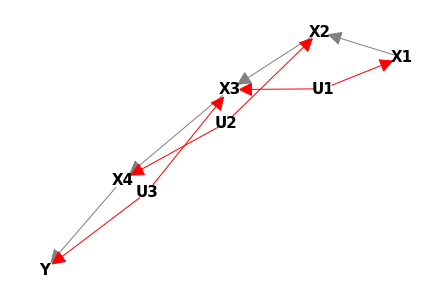

In [3]:
draw(get_example_figure_3_graph())

I use the red arrows to denote that its being emitted from a latent parent. Now, we need the following code to implement the algorithm:

In [4]:
def is_semi_markovian(dag):
    """Tests if DAG is semi-markovian"""
    # Are all latent variables root nodes?
    for n in get_latent_nodes(dag):
        if dag.in_degree(n) != 0:
            return False
    return True


def validate_dag(dag):
    # Is the graph a dag?
    if not nx.is_directed_acyclic_graph(dag):
        raise ValueError('Graph must be a DAG')
             
    # Are all latent variables root nodes?
    if not is_semi_markovian(dag):
        raise ValueError('Latent node {} has a parent'.format(n))
        
def validate_identify_args(dag, X):
    if dag.nodes[X]['latent']:
        return 'X is latent'
    
    
def get_latent_nodes(dag):
    return {n[0] for n in dag.nodes.data('latent') if n[1]}


def get_parents_of_children(dag, X):
    # Get all parents of children
    # but do not include X itself
    parents_of_children = set()
    
    X_children = set(dag.successors(X))
    
    for c in X_children:
        c_parents = set(dag.predecessors(c))
        parents_of_children = parents_of_children.union(c_parents)

    if X in parents_of_children:
        parents_of_children.remove(X)
    return parents_of_children

def get_c_components(dag, U):
    """Assumes dag is semi-markovian"""
    H = dag.copy()
    
    # Remove all edges
    for e in dag.edges:
        if not dag.nodes[e[0]]['latent']:
            H.remove_edge(*e)

    # Delete all edges NOT connected to latent variables
    H = H.to_undirected()
    for nodes in nx.connected_components(H.to_undirected()):
        Ui = nodes.intersection(U)
        Oi = nodes.difference(U)
        yield (Ui, Oi)

In [6]:
def identify(dag, X):
    """Identification algorithm
    
    We test for the three cases and return
    the causal estimand. Otherwise, None is returned
    which is interpreted as not being identifiable
    """
    # Unidentifiable is X is latent
    if X not in dag.nodes:
        raise ValueError('{} is not in DAG'.format(X))
        return None
    
    # Unidentifiable is X is latent
    if dag.nodes[X]['latent']:
        return None
    
    # Make sure DAG and args meets conditions
    # specified by theory
    validate_dag(dag)
    
    # Get the latent and observable nodes
    latent_nodes = get_latent_nodes(dag)
    obs_nodes = set(dag.nodes).difference(latent_nodes)
    
    X_parents = set(dag.predecessors(X))
    X_children = set(dag.successors(X))
    
    # All except X
    V = obs_nodes.difference({X})

    expression = _first_test(dag, X, latent_nodes, V, X_parents)
    if expression is not None:
        return expression
    
    expression = _second_test(dag, X, V, obs_nodes, latent_nodes, X_parents, X_children)
    if expression is not None:
        return expression

    expression = _general_test(dag, V, X_parents, X_children, latent_nodes)
    
    return expression


def _first_test(dag, X, latent_nodes, V, X_parents):
    
    expression = None
    
    # Useful later, for returned causal estimand expression
    X_parents_str = ','.join(X_parents)
    V_str = ','.join(V)
    
    has_no_latent_parents = len(X_parents.intersection(latent_nodes)) == 0
    
    if has_no_latent_parents:
        # Are there parents?
        if len(X_parents) > 0:
            expression = 'P({0}) / P({1}|{2})'.format(V_str, X, X_parents_str)
        else:
            expression = 'P({0}) / P({1}|)'.format(V_str, X)
        
    return expression


def _second_test(dag, X, V, obs_nodes, latent_nodes, X_parents, X_children):
    # Do the children of X share any latent parents with X?
    # If not, we can apply theory
    parents_of_children = get_parents_of_children(dag, X)
    
    common_parents = X_parents.intersection(parents_of_children)
    does_not_share_latent_parents = len(latent_nodes.intersection(common_parents)) == 0
    
    if does_not_share_latent_parents:
        v_str = ','.join(V)
        X_parents_str = ','.join(X_parents)
                
        children_factors = ''
        for c in X_children:
            c_parents = set(dag.predecessors(c))
            c_parents_str = ','.join(c_parents)
            if len(c_parents) > 0:
                children_factors += 'P({0}|{1})'.format(c, c_parents_str)
            else:
                children_factors += 'P({0})'.format(c)
                
        obs_joint_str = 'P(' + ','.join(obs_nodes) + ')'
        
        if len(X_children) > 0:
            expression = children_factors + ' SUM_' + X + \
                         ' ' + obs_joint_str + ' / [' + children_factors + ']'
        else:
            expression = children_factors + ' SUM_' + X + ' ' + obs_joint_str
        
        return expression
    
    
def _general_test(dag, V, X_parents, X_children, latent_nodes):
    # Is there a common latent parent with X and its children?
    # if so, we cannot use the mathematical result
    
    # Get all latent parents of the children
    X_latent_parents = X_parents.intersection(latent_nodes)
    
    C_latent_parents = set()
    for c in X_children:
        C_latent_parents = C_latent_parents.union(set(dag.predecessors(c)))
    C_latent_parents = C_latent_parents.intersection(latent_nodes)
    
    if len(X_latent_parents.intersection(C_latent_parents)) > 0:
        return
    
    # Arrange by topological order
    V = [n for n in nx.topological_sort(dag) if n in V]
    for i in range(len(V)):
        dag_c = dag.subgraph(V[:i])
        
        for Ui, Oi in get_c_components(dag_c, latent_nodes):
            print(Ui, Oi)

'P(X2|U2,X1) SUM_X1 P(X2,X3,X4,X1,Y) / [P(X2|U2,X1)]'

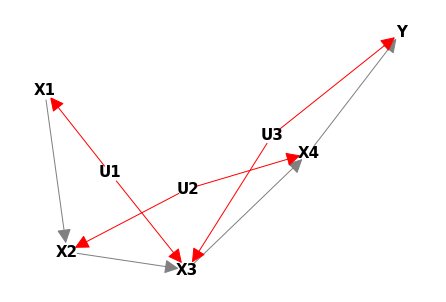

In [7]:
dag = get_example_figure_3_graph()
draw(dag)
identify(dag, 'X1')

# Trying It Out

'P(Z,Y) / P(X|Z)'

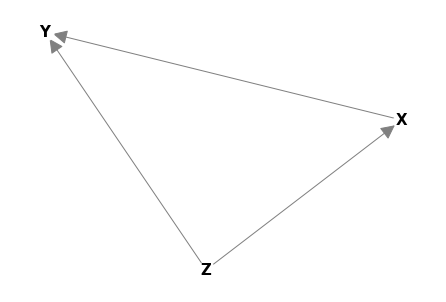

In [8]:
dag = get_simple_graph()
draw(dag)
identify(dag, 'X')

'P(Z1|Z2,X) SUM_X P(X,Z2,Z3,Z1,Y) / [P(Z1|Z2,X)]'

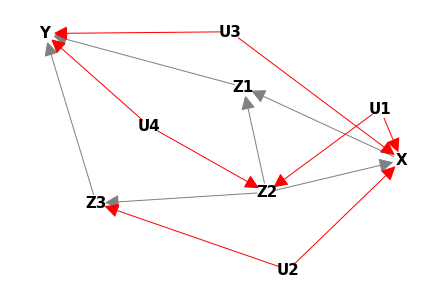

In [9]:
dag = get_example_figure_1_graph()
draw(dag)
identify(dag, 'X')

'P(Z1|U2,X) SUM_X P(Z1,Z2,Y,X) / [P(Z1|U2,X)]'

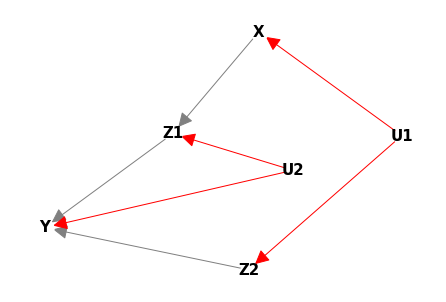

In [10]:
dag = get_example_figure_2_graph()
draw(dag)
identify(dag, 'X')

'P(X2|U2,X1) SUM_X1 P(X2,X3,X4,X1,Y) / [P(X2|U2,X1)]'

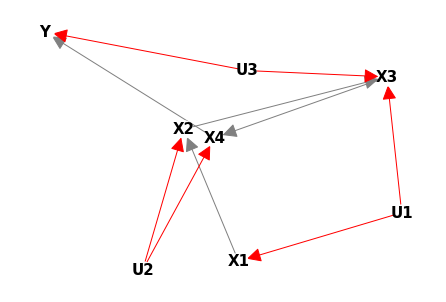

In [11]:
dag = get_example_figure_3_graph()
draw(dag)
identify(dag, 'X1')

# References

<a id="pearl_1995"></a>[Pearl, 1995] <a href="http://bayes.cs.ucla.edu/R218-B.pdf">Causal diagrams for empirical research</a>

<a id="huang_2006"></a>[Huang and Valtorta, 2006] <a href="https://cse.sc.edu/~mgv/papers/HuangValtortaUAI06.pdf">Pearl’s Calculus of Intervention Is Complete</a>

<a id="shpitser_2006"></a>[Shpitser and Pearl, 2006] <a href="https://ftp.cs.ucla.edu/pub/stat_ser/r327.pdf">Identification of Joint Interventional Distributions
in Recursive Semi-Markovian Causal Models</a>

<a id="nielsen_2012"></a>[Nielsen and Pearl, 2012] <a href="http://www.michaelnielsen.org/ddi/guest-post-judea-pearl-on-correlation-causation-and-the-psychology-of-simpsons-paradox/">Guest post: Judea Pearl on correlation, causation and the psychology of Simpson’s paradox</a>